## Snare Algorithm 

### Setup

In [1]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# load the data
reels = pd.read_csv('reel_events_rows-2.csv')
reels 

,id,user_id,song_id,event_type,started_at,ended_at,dwell_seconds,pct_watched,session_id,position_in_session,context,rating,added_to_library
0,000e1543-d7d2-4149-bcd7-bcb2618cb17f,f52565a6-0a5a-4ae4-8389-36ac86f85049,0852bb1b-74bb-528d-a267-06b886d4f680,impression_end,2025-09-24 13:47:08.531+00,2025-09-24 13:47:13.269+00,4.738390,0.0,9b350908-fb32-431e-b305-932bb6173272,8.0,"{""source"":""reels""}",NaN,False
1,001ae2fc-7fb0-4ab7-8980-b27a28771fc9,ce166171-1f55-45d0-beb3-924d9aa7a1ee,384b9d9b-d9de-5847-9b81-da8f467541df,impression_end,2025-09-28 00:15:08+00,2025-09-28 00:15:09.786+00,1.786200,0.0,7f7f3116-10c0-4d90-b3e5-44a812e776a0,3.0,"{""source"":""reels""}",NaN,False
2,00250c00-ab7d-4061-a9cd-c72c7d01deff,2753fb39-604a-47fc-b8e2-b9416a9ba316,f9b5c9b8-b876-5c69-9592-25e7dd645d8c,impression_end,2025-10-03 05:05:48.233+00,2025-10-03 05:05:50.322+00,2.089020,0.0,5ae83df1-f98f-480b-a084-99425acb118e,29.0,"{""source"":""reels""}",NaN,False
3,004715d8-0ea4-4f49-8b80-1fa18fc37752,c12b7b24-f8dd-412a-a750-ed391f8dcd4f,189770d1-a334-5de1-9b74-78e005b252a2,impression_end,2025-10-16 04:39:17.73+00,2025-10-16 04:39:45.456+00,27.725800,0.0,bbdf9977-9efa-4c30-ae9d-41172cb80403,7.0,"{""source"":""reels""}",thumbs_up,False
4,004768dc-13cc-4550-abce-290bd1bc243f,4773fa16-bc42-43e3-beca-a9b31c0c7915,7e5bb030-fbf6-519d-ab79-8f431c562a10,impression_end,2025-09-22 16:29:39.058+00,2025-09-22 16:29:39.942+00,0.884207,0.0,d0c496ec-5674-45a6-a5df-a822fd057bf3,5.0,"{""source"":""reels""}",NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3376,ffda4224-f928-42ec-9c0c-99c4c057d4b6,8e3c4a5a-51ad-4292-bdaa-4ef6820e6948,3fc9dee8-7ef1-5e58-9793-966e31b5bd98,impression_end,2025-09-19 19:53:53.897+00,2025-09-19 19:53:59.439+00,5.542230,0.0,e295749b-da24-485c-8472-b77ce0134023,14.0,"{""source"":""reels""}",NaN,False
3377,ffdc179b-d85e-4516-a7cf-055235c9a0ba,97fd881a-4651-4793-a8d3-04d520406143,1c67d38f-876d-5f50-a064-2dd045fd59ad,impression_end,2025-09-16 17:24:27.246+00,2025-09-16 17:24:29.04+00,1.794330,0.0,165c283b-3277-4779-810f-69b02d057d43,6.0,"{""source"":""reels""}",NaN,False
3378,ffe234fa-1e78-4b37-8e3d-593736e28a34,9eee712c-d0d4-4c78-8705-f985f351549c,8b97af29-ea1b-578b-addf-5a8df65e38e7,impression_end,2025-09-21 16:47:36.299+00,2025-09-21 16:47:39.002+00,2.703290,0.0,86258082-03cd-4cbc-9828-542197996e2a,8.0,"{""source"":""reels""}",NaN,False
3379,fff1f22a-3305-4172-947a-a974b314b082,941f2256-a976-45cb-b37c-40127162bc41,7710c136-94a8-5a84-bb22-229730bc41ba,impression_end,2025-09-23 23:08:37.354+00,2025-09-23 23:08:45.035+00,7.681070,0.0,47659799-962f-433f-bccd-a279b7f7cbc6,30.0,"{""source"":""reels""}",NaN,False


In [10]:
songs = pd.read_csv('songs_rows.csv')
songs 

,id,title,artist,album,album_art_url,duration,genre,release_date,created_at,spotify_id,apple_music_id,preview_url,external_urls,isrc,artist_ids,artist_names,is_explicit
0,0006d829-5626-5161-8232-9195d3aca1e2,Coffee & TV,Blur,13,musicKit://artwork/library/550BB193-21D9-45D9-...,358.773,Rock,1998-03-15 00:00:00+00,2025-09-17 18:13:24.465+00,NaN,i.LVk4vD6FlzRm31b,NaN,"{""apple_music"":""https://music.apple.com/us/son...",NaN,NaN,"[""Blur""]",NaN
1,0009ff43-6b63-5238-bc80-bdf342c29962,MM3,SoFaygo,JACKBOYS 2,https://is1-ssl.mzstatic.com/image/thumb/Music...,174.532,Hip-Hop/Rap,2025-07-13 00:00:00+00,2025-07-15 05:38:23.753+00,NaN,1826343595,https://audio-ssl.itunes.apple.com/itunes-asse...,"{""apple_music"":""https://music.apple.com/us/son...",NaN,NaN,NaN,True
2,0016a6ad-c858-538e-aee3-5446f7b0cfff,Cellular (Live),King Krule,"You Heat Me Up, You Cool Me Down",musicKit://artwork/library/0598BF71-7157-42E8-...,210.000,Alternative,2021-09-10 00:00:00+00,2025-08-15 17:23:45.451+00,NaN,i.4YBeZDLi2VkWzGx,NaN,"{""apple_music"":""https://music.apple.com/us/son...",NaN,NaN,"[""King Krule""]",False
3,00175ab6-2c6d-58f7-a405-4b3c55780f82,Revival,The Allman Brothers Band,Idlewild South (Deluxe Edition),https://is1-ssl.mzstatic.com/image/thumb/Music...,246.260,Rock,1970-09-23 00:00:00+00,2025-08-16 21:53:01.693+00,NaN,1469554636,https://audio-ssl.itunes.apple.com/itunes-asse...,"{""apple_music"":""https://music.apple.com/us/son...",NaN,NaN,"[""The Allman Brothers Band""]",False
4,0017fbc4-623b-5815-a1d9-f7dc84eed39e,Saturday Night Raw (feat. Nick James),Ramirez,Blood Diamonds,https://is1-ssl.mzstatic.com/image/thumb/Music...,146.920,Hip-Hop/Rap,2015-11-06 00:00:00+00,2025-07-29 23:32:54.152+00,NaN,1330074420,https://audio-ssl.itunes.apple.com/itunes-asse...,"{""apple_music"":""https://music.apple.com/us/son...",NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26704,fff228af-2157-5680-aaa0-3d297164855f,Sunflower (Spider-Man: Into the Spider-Verse),Post Malone,Spider-Man: Into the Spider-Verse (Soundtrack ...,musicKit://artwork/library/E6361B9B-23DA-42BF-...,158.040,Hip-Hop/Rap,2018-10-19 00:00:00+00,2025-08-11 18:43:11.407+00,NaN,i.zpZDx3QU0PGea,NaN,"{""apple_music"":""https://music.apple.com/us/son...",NaN,NaN,"[""Post Malone"",""Swae Lee""]",False
26705,fff3e11e-d9b3-5387-a3b7-5dae3cbfcdc5,Metal Health (Bang Your Head),Quiet Riot,Metal Health (Bonus Track Version),https://is1-ssl.mzstatic.com/image/thumb/Music...,316.867,Hard Rock,1983-03-11 00:00:00+00,2025-09-09 18:09:17.245+00,NaN,190737658,https://audio-ssl.itunes.apple.com/itunes-asse...,"{""apple_music"":""https://music.apple.com/us/son...",NaN,NaN,"[""Quiet Riot""]",False
26706,fff3f7e8-49f9-5efb-bddf-e352ba9f4577,Follow God,Kanye West,JESUS IS KING,musicKit://artwork/library/8392831A-431B-4862-...,104.591,Hip-Hop/Rap,2019-10-25 00:00:00+00,2025-07-31 14:54:27.405+00,NaN,i.XMDV179CvEBLPVQ,NaN,"{""apple_music"":""https://music.apple.com/us/son...",NaN,NaN,NaN,False
26707,fff4cde5-6835-508f-8de7-696bc1406eaf,Sociopath (feat. Kash Doll),Pusha T,Push and P - EP,https://is1-ssl.mzstatic.com/image/thumb/Music...,162.000,Hip-Hop/Rap,2019-08-26 00:00:00+00,2025-07-25 02:19:31.524+00,NaN,1616953482,https://audio-ssl.itunes.apple.com/itunes-asse...,"{""apple_music"":""https://music.apple.com/us/son...",NaN,NaN,NaN,True


### Exploratory Data Analysis 

In [ ]:
# rename id to song_id for songs df 
songs = songs.rename(columns={'id': 'song_id'})

In [ ]:
# merge the songs data with the reels data keeping the reels data as the primary df 
merged_df = pd.merge(reels, songs, on='song_id', how='left')
merged_df.head()

,id,user_id,song_id,event_type,started_at,ended_at,dwell_seconds,pct_watched,session_id,position_in_session,context,rating,added_to_library,title,artist,album,album_art_url,duration,genre,release_date,created_at,spotify_id,apple_music_id,preview_url,external_urls,isrc,artist_ids,artist_names,is_explicit
0,000e1543-d7d2-4149-bcd7-bcb2618cb17f,f52565a6-0a5a-4ae4-8389-36ac86f85049,0852bb1b-74bb-528d-a267-06b886d4f680,impression_end,2025-09-24 13:47:08.531+00,2025-09-24 13:47:13.269+00,4.738390,0.0,9b350908-fb32-431e-b305-932bb6173272,8.0,"{""source"":""reels""}",NaN,False,My Own Mess,Skegss,My Own Mess,musicKit://artwork/library/51D11B0E-0F89-458A-...,160.148,Alternative,2018-09-06 00:00:00+00,2025-09-23 20:25:21.704+00,NaN,i.aJGoorvtEGEdKR5,NaN,"{""apple_music"":""https://music.apple.com/us/son...",NaN,NaN,"[""Skegss""]",False
1,001ae2fc-7fb0-4ab7-8980-b27a28771fc9,ce166171-1f55-45d0-beb3-924d9aa7a1ee,384b9d9b-d9de-5847-9b81-da8f467541df,impression_end,2025-09-28 00:15:08+00,2025-09-28 00:15:09.786+00,1.786200,0.0,7f7f3116-10c0-4d90-b3e5-44a812e776a0,3.0,"{""source"":""reels""}",NaN,False,ocean eyes,Billie Eilish,dont smile at me,musicKit://artwork/library/8392831A-431B-4862-...,200.379,Alternative,2016-05-18 00:00:00+00,2025-07-29 16:18:29.3+00,NaN,i.WmYRMlksxoekAzP,NaN,"{""apple_music"":""https://music.apple.com/us/son...",NaN,NaN,NaN,False
2,00250c00-ab7d-4061-a9cd-c72c7d01deff,2753fb39-604a-47fc-b8e2-b9416a9ba316,f9b5c9b8-b876-5c69-9592-25e7dd645d8c,impression_end,2025-10-03 05:05:48.233+00,2025-10-03 05:05:50.322+00,2.089020,0.0,5ae83df1-f98f-480b-a084-99425acb118e,29.0,"{""source"":""reels""}",NaN,False,Morning Ride,Fiji,Collection: 50th State of Mind,musicKit://artwork/library/4559C7DF-0884-40F7-...,223.787,Reggae,2006-04-09 00:00:00+00,2025-10-01 18:03:42.633+00,NaN,i.vMX1GmZF9b4Z1vg,NaN,"{""apple_music"":""https://music.apple.com/us/son...",NaN,NaN,"[""Fiji""]",False
3,004715d8-0ea4-4f49-8b80-1fa18fc37752,c12b7b24-f8dd-412a-a750-ed391f8dcd4f,189770d1-a334-5de1-9b74-78e005b252a2,impression_end,2025-10-16 04:39:17.73+00,2025-10-16 04:39:45.456+00,27.725800,0.0,bbdf9977-9efa-4c30-ae9d-41172cb80403,7.0,"{""source"":""reels""}",thumbs_up,False,The Fate of Ophelia,Taylor Swift,The Life of a Showgirl,https://is1-ssl.mzstatic.com/image/thumb/Music...,226.074,Pop,2025-10-03 04:08:06.613+00,2025-10-03 04:08:06.613+00,NaN,1838810951,https://audio-ssl.itunes.apple.com/itunes-asse...,"{""apple_music"":""https://music.apple.com/us/son...",NaN,NaN,"[""Taylor Swift""]",False
4,004768dc-13cc-4550-abce-290bd1bc243f,4773fa16-bc42-43e3-beca-a9b31c0c7915,7e5bb030-fbf6-519d-ab79-8f431c562a10,impression_end,2025-09-22 16:29:39.058+00,2025-09-22 16:29:39.942+00,0.884207,0.0,d0c496ec-5674-45a6-a5df-a822fd057bf3,5.0,"{""source"":""reels""}",NaN,False,Rodeo Clowns,G. Love,Philadelphonic,musicKit://artwork/library/0598BF71-7157-42E8-...,176.733,Rock,1994-01-01 00:00:00+00,2025-09-22 01:13:11.598+00,NaN,i.mmpYgaJHlq6be3g,NaN,"{""apple_music"":""https://music.apple.com/us/son...",NaN,NaN,"[""G. Love"",""Special Sauce""]",False


### Reels × Songs merge (left) and EDA
We keep only the reels rows (left join already ensures this), then enrich with song metadata for labeling and analysis.


In [17]:
# Ensure left-only data is preserved and basic cleaning
# merged_df already exists from prior cell per user's instruction

# Keep only reels events (defensive filter in case of mixed sources)
reels_only = merged_df.loc[merged_df.get('context', '').astype(str).str.contains('reels', case=False, na=False)].copy()

# Prefer song metadata where available, but keep all reels rows
# Some songs may not match; fill with placeholders for labeling
label_cols = ['title', 'artist', 'artist_names', 'genre']
for col in label_cols:
    if col not in reels_only.columns:
        reels_only[col] = np.nan

reels_only['title_label'] = reels_only['title'].fillna('[unknown title]')
reels_only['artist_label'] = (
    reels_only['artist']
    .fillna(reels_only['artist_names'])
    .fillna('[unknown artist]')
)

# Normalize event timestamps
for ts_col in ['started_at', 'ended_at']:
    if ts_col in reels_only.columns:
        reels_only[ts_col] = pd.to_datetime(reels_only[ts_col], errors='coerce')

# Coerce numerics
for num_col in ['dwell_seconds', 'pct_watched', 'position_in_session']:
    if num_col in reels_only.columns:
        reels_only[num_col] = pd.to_numeric(reels_only[num_col], errors='coerce')

# Convenience: event_date for grouping
if 'started_at' in reels_only.columns:
    reels_only['event_date'] = reels_only['started_at'].dt.date

print('Rows after filtering to reels only:', len(reels_only))
reels_only.head(3)


Rows after filtering to reels only: 3381


,id,user_id,song_id,event_type,started_at,ended_at,dwell_seconds,pct_watched,session_id,position_in_session,context,rating,added_to_library,title,artist,album,album_art_url,duration,genre,release_date,created_at,spotify_id,apple_music_id,preview_url,external_urls,isrc,artist_ids,artist_names,is_explicit,title_label,artist_label,event_date
0,000e1543-d7d2-4149-bcd7-bcb2618cb17f,f52565a6-0a5a-4ae4-8389-36ac86f85049,0852bb1b-74bb-528d-a267-06b886d4f680,impression_end,2025-09-24 13:47:08.531000+00:00,2025-09-24 13:47:13.269000+00:00,4.73839,0.0,9b350908-fb32-431e-b305-932bb6173272,8.0,"{""source"":""reels""}",NaN,False,My Own Mess,Skegss,My Own Mess,musicKit://artwork/library/51D11B0E-0F89-458A-...,160.148,Alternative,2018-09-06 00:00:00+00,2025-09-23 20:25:21.704+00,NaN,i.aJGoorvtEGEdKR5,NaN,"{""apple_music"":""https://music.apple.com/us/son...",NaN,NaN,"[""Skegss""]",False,My Own Mess,Skegss,2025-09-24
1,001ae2fc-7fb0-4ab7-8980-b27a28771fc9,ce166171-1f55-45d0-beb3-924d9aa7a1ee,384b9d9b-d9de-5847-9b81-da8f467541df,impression_end,NaT,2025-09-28 00:15:09.786000+00:00,1.78620,0.0,7f7f3116-10c0-4d90-b3e5-44a812e776a0,3.0,"{""source"":""reels""}",NaN,False,ocean eyes,Billie Eilish,dont smile at me,musicKit://artwork/library/8392831A-431B-4862-...,200.379,Alternative,2016-05-18 00:00:00+00,2025-07-29 16:18:29.3+00,NaN,i.WmYRMlksxoekAzP,NaN,"{""apple_music"":""https://music.apple.com/us/son...",NaN,NaN,NaN,False,ocean eyes,Billie Eilish,NaT
2,00250c00-ab7d-4061-a9cd-c72c7d01deff,2753fb39-604a-47fc-b8e2-b9416a9ba316,f9b5c9b8-b876-5c69-9592-25e7dd645d8c,impression_end,2025-10-03 05:05:48.233000+00:00,2025-10-03 05:05:50.322000+00:00,2.08902,0.0,5ae83df1-f98f-480b-a084-99425acb118e,29.0,"{""source"":""reels""}",NaN,False,Morning Ride,Fiji,Collection: 50th State of Mind,musicKit://artwork/library/4559C7DF-0884-40F7-...,223.787,Reggae,2006-04-09 00:00:00+00,2025-10-01 18:03:42.633+00,NaN,i.vMX1GmZF9b4Z1vg,NaN,"{""apple_music"":""https://music.apple.com/us/son...",NaN,NaN,"[""Fiji""]",False,Morning Ride,Fiji,2025-10-03


In [18]:
# Overview stats
print('Unique users:', reels_only['user_id'].nunique())
print('Unique songs in reels:', reels_only['song_id'].nunique())
print('Events by type:')
print(reels_only['event_type'].value_counts().head(10))

if 'rating' in reels_only.columns:
    print('\nRatings distribution:')
    print(reels_only['rating'].value_counts(dropna=False))

# Dwell and pct watched basics
for col in ['dwell_seconds', 'pct_watched']:
    if col in reels_only.columns:
        desc = reels_only[col].describe(percentiles=[0.1,0.25,0.5,0.75,0.9])
        print(f"\n{col} describe:\n", desc)



Unique users: 49
Unique songs in reels: 2152
Events by type:
event_type
impression_end      3221
thumbs_up             95
thumbs_down           60
impression_start       5
Name: count, dtype: int64

Ratings distribution:
rating
NaN            2903
thumbs_up       333
thumbs_down     145
Name: count, dtype: int64

dwell_seconds describe:
 count     3214.000000
mean        39.393474
std        837.751035
min          0.087808
10%          0.392831
25%          0.883869
50%          1.522630
75%          3.628260
90%          9.970258
max      37854.700000
Name: dwell_seconds, dtype: float64

pct_watched describe:
 count    3221.000000
mean        0.000511
std         0.019871
min         0.000000
10%         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
90%         0.000000
max         1.000000
Name: pct_watched, dtype: float64


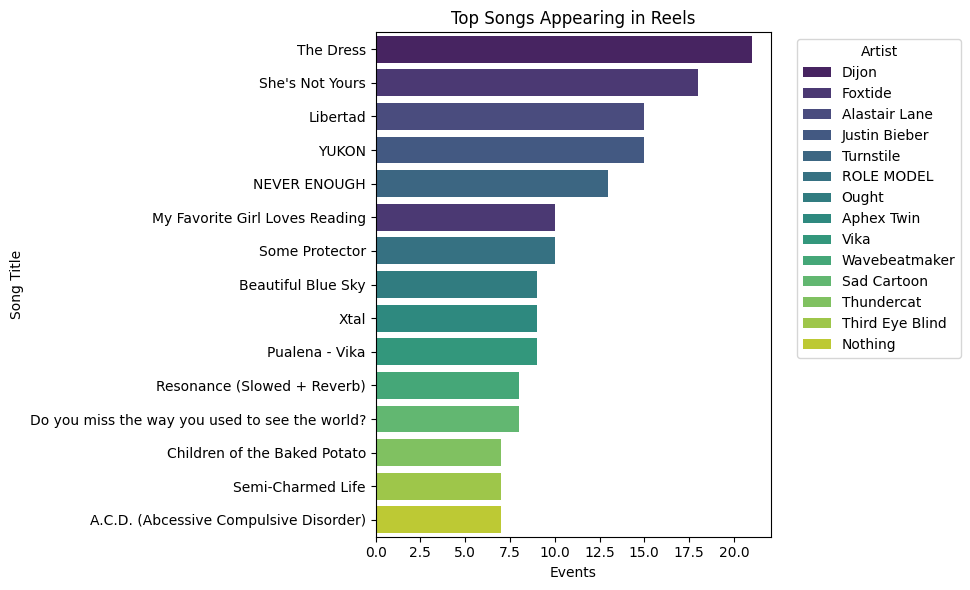

,song_id,title_label,artist_label,events
357,2afc1707-d3d7-576a-afc1-d236281805a1,The Dress,Dijon,21
1697,cbf51d02-b37f-57c4-9765-5d5dbaafe848,She's Not Yours,Foxtide,18
2130,fe1f2a2d-1092-5d32-b4f9-172cf932c80b,Libertad,Alastair Lane,15
1753,d2fa3a90-665d-5994-87ac-757562ce7fa7,YUKON,Justin Bieber,15
2016,f16e555e-04c8-5744-a758-5d5b23c92acd,NEVER ENOUGH,Turnstile,13
1206,8e96c668-4612-5282-b7af-fd5fb4b473a1,My Favorite Girl Loves Reading,Foxtide,10
1237,9371d4a9-e954-546c-bc3a-c9bd36476bbd,Some Protector,ROLE MODEL,10
359,2b3ca500-1c98-5d87-83e6-cc25b06c01f7,Beautiful Blue Sky,Ought,9
290,22eb8458-1276-5436-a0fe-c9e77c2838b5,Xtal,Aphex Twin,9
199,17f17a80-da5c-58c2-8173-296e5417bef1,Pualena - Vika,Vika,9


In [19]:
# Top songs by reels impressions (or events)
TOP_N = 15

song_counts = (
    reels_only.groupby(['song_id', 'title_label', 'artist_label'], dropna=False)
    .size()
    .reset_index(name='events')
    .sort_values('events', ascending=False)
    .head(TOP_N)
)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=song_counts,
    y='title_label', x='events',
    hue='artist_label', dodge=False, palette='viridis'
)
plt.title('Top Songs Appearing in Reels')
plt.xlabel('Events')
plt.ylabel('Song Title')
plt.legend(title='Artist', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

song_counts


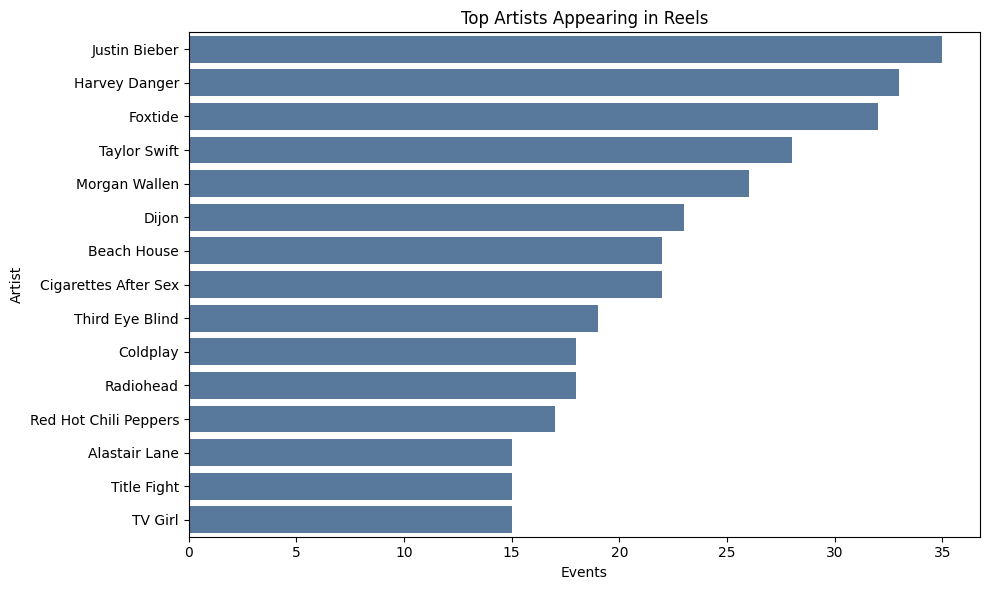

,artist_for_group,events
536,Justin Bieber,35
434,Harvey Danger,33
368,Foxtide,32
992,Taylor Swift,28
710,Morgan Wallen,26
278,Dijon,23
100,Beach House,22
217,Cigarettes After Sex,22
1076,Third Eye Blind,19
224,Coldplay,18


In [20]:
# Top artists by reels impressions
artist_counts = (
    reels_only.assign(artist_for_group=reels_only['artist_label'])
    .groupby('artist_for_group', dropna=False)
    .size()
    .reset_index(name='events')
    .sort_values('events', ascending=False)
    .head(TOP_N)
)

plt.figure(figsize=(10, 6))
sns.barplot(data=artist_counts, y='artist_for_group', x='events', color='#4c78a8')
plt.title('Top Artists Appearing in Reels')
plt.xlabel('Events')
plt.ylabel('Artist')
plt.tight_layout()
plt.show()

artist_counts


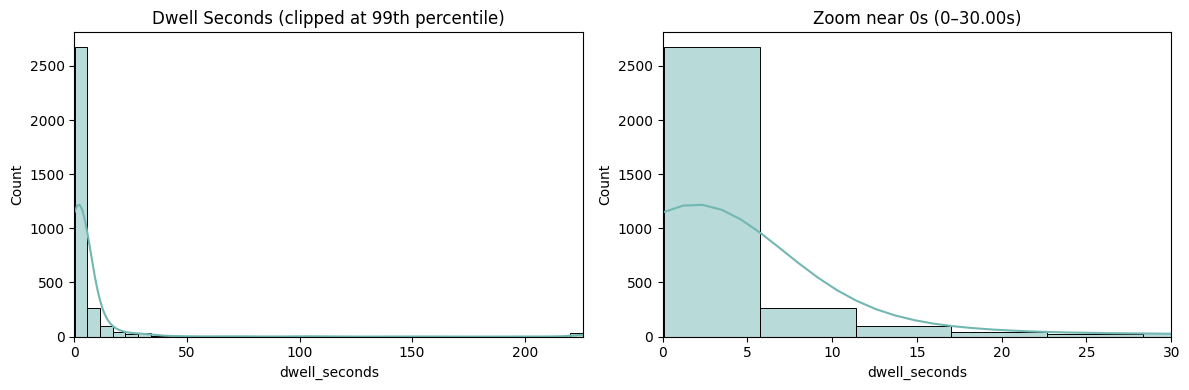

In [45]:
# Engagement distribution (dwell_seconds)
if 'dwell_seconds' in reels_only.columns:
    import numpy as np
    ds = reels_only['dwell_seconds'].dropna()
    if len(ds) > 0:
        upper = float(np.nanpercentile(ds, 99))
        ds = ds.clip(lower=0, upper=upper)
        zoom_upper = float(min(upper, 30))
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))
        # Full range up to 99th percentile
        sns.histplot(ds, bins=40, kde=True, ax=axes[0], color='#72b7b2')
        axes[0].set_title('Dwell Seconds (clipped at 99th percentile)')
        axes[0].set_xlabel('dwell_seconds')
        axes[0].set_xlim(0, upper)
        # Zoom near zero seconds
        sns.histplot(ds, bins=40, kde=True, ax=axes[1], color='#72b7b2')
        axes[1].set_title(f'Zoom near 0s (0–{zoom_upper:.2f}s)')
        axes[1].set_xlabel('dwell_seconds')
        axes[1].set_xlim(0, zoom_upper)
        plt.tight_layout()
        plt.show()
    else:
        print("No dwell_seconds data available.")
else:
    print("Column 'dwell_seconds' not found.")


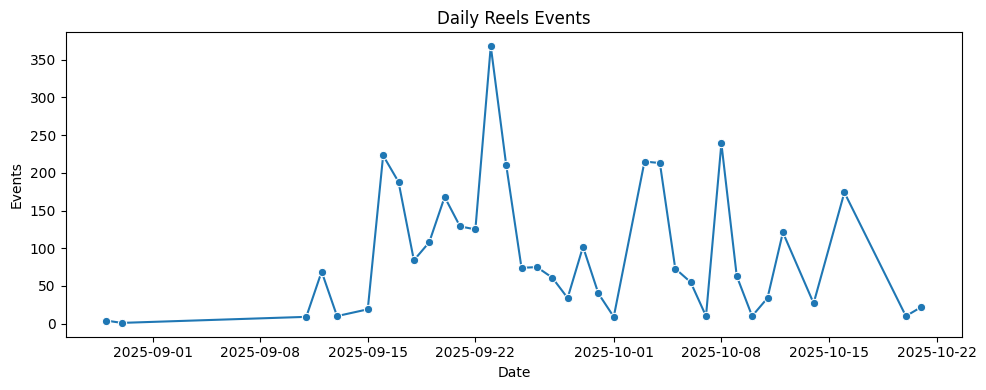

In [22]:
# Daily trends of reels events
if 'event_date' in reels_only.columns:
    daily = reels_only.groupby('event_date').size().reset_index(name='events')
    plt.figure(figsize=(10, 4))
    sns.lineplot(data=daily, x='event_date', y='events', marker='o')
    plt.title('Daily Reels Events')
    plt.xlabel('Date')
    plt.ylabel('Events')
    plt.tight_layout()
    plt.show()
    daily.head(10)


### User reactions and saves
Top songs by thumbs up/down and added-to-library, plus highest dwell time.


In [34]:
# Helper to compute top-N counts for a boolean/flag column
from typing import Tuple

def top_flag_counts(df: pd.DataFrame, flag_series: pd.Series, top_n: int = 15) -> pd.DataFrame:
    mask = flag_series.fillna(False).astype(bool)
    grouped = (
        df.loc[mask]
        .groupby(['song_id', 'title_label', 'artist_label'], dropna=False)
        .size()
        .reset_index(name='count')
        .sort_values('count', ascending=False)
        .head(top_n)
    )
    return grouped

TOP_N = 15


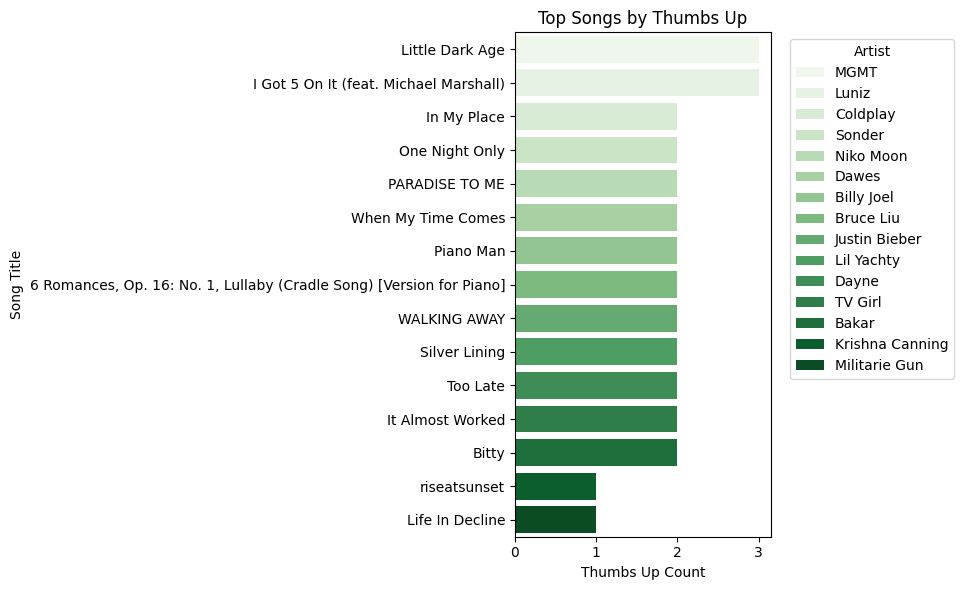

,song_id,title_label,artist_label,count
234,b8b7650a-9c16-5cc7-a1c7-601abbee20a0,Little Dark Age,MGMT,3
113,590d1402-50ef-51f8-bf7f-8c4686929fee,I Got 5 On It (feat. Michael Marshall),Luniz,3
67,33e195b6-9d81-533a-954d-14ffa47a3097,In My Place,Coldplay,2
122,601c295a-0c23-5353-a152-20eddc26fdb2,One Night Only,Sonder,2
196,965fea3a-b106-514d-8a7c-9cf81a5820cc,PARADISE TO ME,Niko Moon,2
267,d9f8a0a6-5b36-5aef-abd6-19e02b91634f,When My Time Comes,Dawes,2
283,e3ee06af-7fd9-547e-aeac-c339f0ab528f,Piano Man,Billy Joel,2
285,e589ec4f-a8a8-59f5-9e1c-ea112084f399,"6 Romances, Op. 16: No. 1, Lullaby (Cradle Son...",Bruce Liu,2
286,e6345709-fbfa-5811-aed6-54e4faf0c4bd,WALKING AWAY,Justin Bieber,2
209,a61e4a70-acfd-559c-ba2f-9a308c478c5b,Silver Lining,Lil Yachty,2


In [25]:
# Top songs by thumbs up
flag_up = reels_only['rating'].astype(str).str.lower().eq('thumbs_up') if 'rating' in reels_only.columns else pd.Series(False, index=reels_only.index)
thumbs_up_top = top_flag_counts(reels_only, flag_up, TOP_N)

plt.figure(figsize=(10, 6))
sns.barplot(data=thumbs_up_top, y='title_label', x='count', hue='artist_label', dodge=False, palette='Greens')
plt.title('Top Songs by Thumbs Up')
plt.xlabel('Thumbs Up Count')
plt.ylabel('Song Title')
plt.legend(title='Artist', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

thumbs_up_top


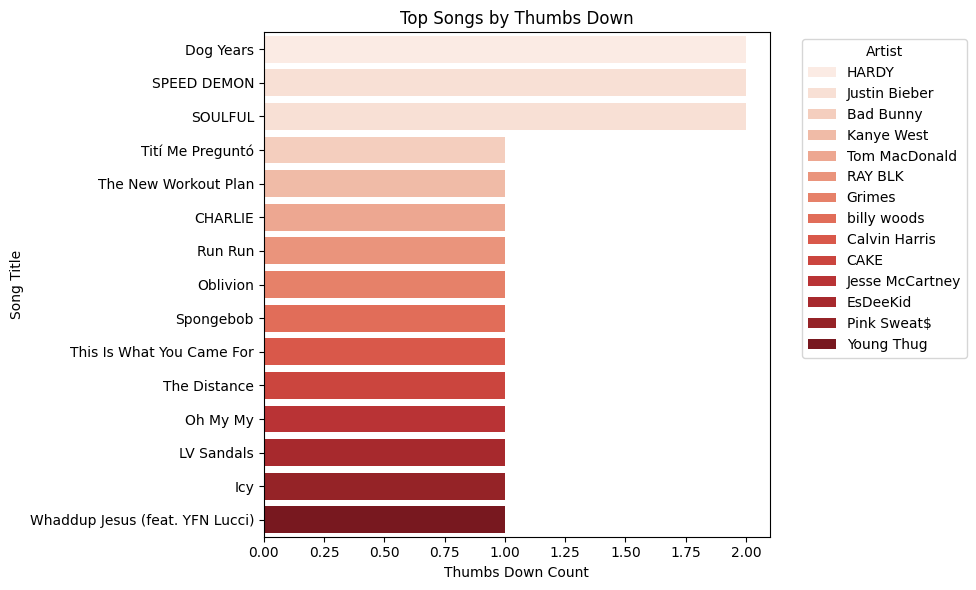

,song_id,title_label,artist_label,count
27,37aa91a9-ae3c-5de0-98ea-a7be93b371c1,Dog Years,HARDY,2
98,b0aa9003-6fba-5b84-bb39-748e669cbcbb,SPEED DEMON,Justin Bieber,2
101,b9c3ea43-4be3-582c-be74-779e6783f3cd,SOULFUL,Justin Bieber,2
92,a58d43cb-7ca2-5580-b2af-0b739745f5a3,Tití Me Preguntó,Bad Bunny,1
93,a5c1c553-ca0d-58ac-8fd2-a135fc624f84,The New Workout Plan,Kanye West,1
94,a9d7a6a9-4a88-5e34-90ee-14f275cb9255,CHARLIE,Tom MacDonald,1
95,ac23203d-8d94-58a6-89b9-9188b724f81c,Run Run,RAY BLK,1
96,ac9a4f59-23b8-5d10-89db-0db952e8ba21,Oblivion,Grimes,1
97,aed1c19e-ebb3-5a7f-806b-e47271f47d6e,Spongebob,billy woods,1
0,002f3e20-2999-5481-b045-be903fa1b65e,This Is What You Came For,Calvin Harris,1


In [26]:
# Top songs by thumbs down
flag_down = reels_only['rating'].astype(str).str.lower().eq('thumbs_down') if 'rating' in reels_only.columns else pd.Series(False, index=reels_only.index)
thumbs_down_top = top_flag_counts(reels_only, flag_down, TOP_N)

plt.figure(figsize=(10, 6))
sns.barplot(data=thumbs_down_top, y='title_label', x='count', hue='artist_label', dodge=False, palette='Reds')
plt.title('Top Songs by Thumbs Down')
plt.xlabel('Thumbs Down Count')
plt.ylabel('Song Title')
plt.legend(title='Artist', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

thumbs_down_top


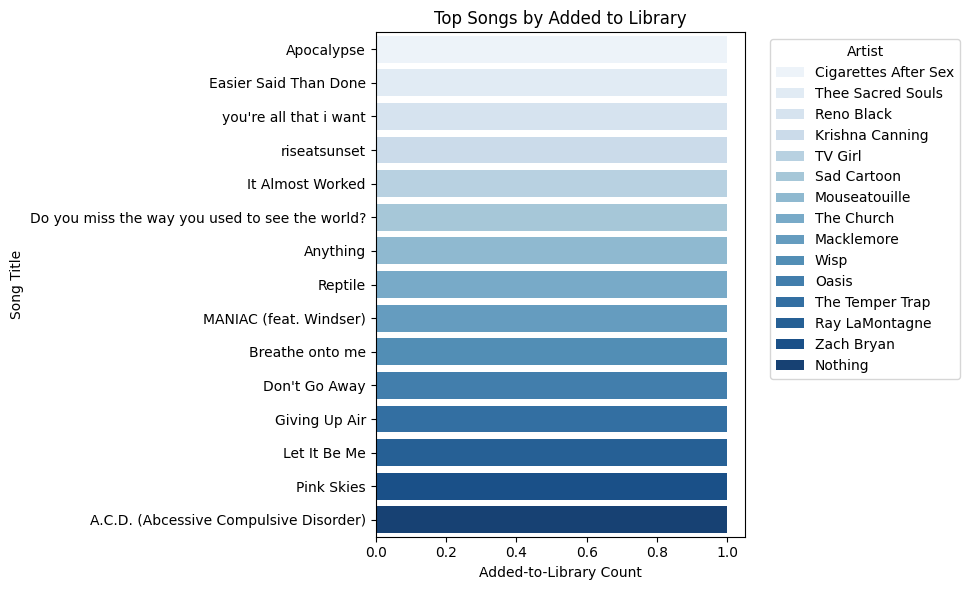

,song_id,title_label,artist_label,count
0,064ca26c-d031-5195-9e18-db889638e20b,Apocalypse,Cigarettes After Sex,1
28,e04b84f8-e6f9-502a-bf9e-a386520767a0,Easier Said Than Done,Thee Sacred Souls,1
21,a8568a55-0be8-51b5-9e0c-a7f7ee13cf52,you're all that i want,Reno Black,1
22,b3fe2ab9-ec66-5112-8c83-b9f746e070c7,riseatsunset,Krishna Canning,1
23,c2165dcf-7fbb-5804-b729-93da8f79cc52,It Almost Worked,TV Girl,1
24,c4f315dc-2b65-5ba6-8ecb-abec353871e2,Do you miss the way you used to see the world?,Sad Cartoon,1
25,d67f030e-9c19-5bc5-a9aa-ca093a35a9b0,Anything,Mouseatouille,1
26,d97f7f32-78ce-52ec-b05b-24172a0e4391,Reptile,The Church,1
27,dfb68f53-84ba-5672-bc8a-ef8acc3a4bb4,MANIAC (feat. Windser),Macklemore,1
29,eba412cf-10dd-5ae9-b201-2ce515a1dc63,Breathe onto me,Wisp,1


In [27]:
# Top songs by added to library
# Column appears as boolean strings 'true'/'false' in reels; normalize to boolean
added_flag = (
    reels_only['added_to_library']
        .astype(str)
        .str.lower()
        .isin(['true', '1', 'yes'])
        if 'added_to_library' in reels_only.columns else pd.Series(False, index=reels_only.index)
)
added_top = top_flag_counts(reels_only, added_flag, TOP_N)

plt.figure(figsize=(10, 6))
sns.barplot(data=added_top, y='title_label', x='count', hue='artist_label', dodge=False, palette='Blues')
plt.title('Top Songs by Added to Library')
plt.xlabel('Added-to-Library Count')
plt.ylabel('Song Title')
plt.legend(title='Artist', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

added_top


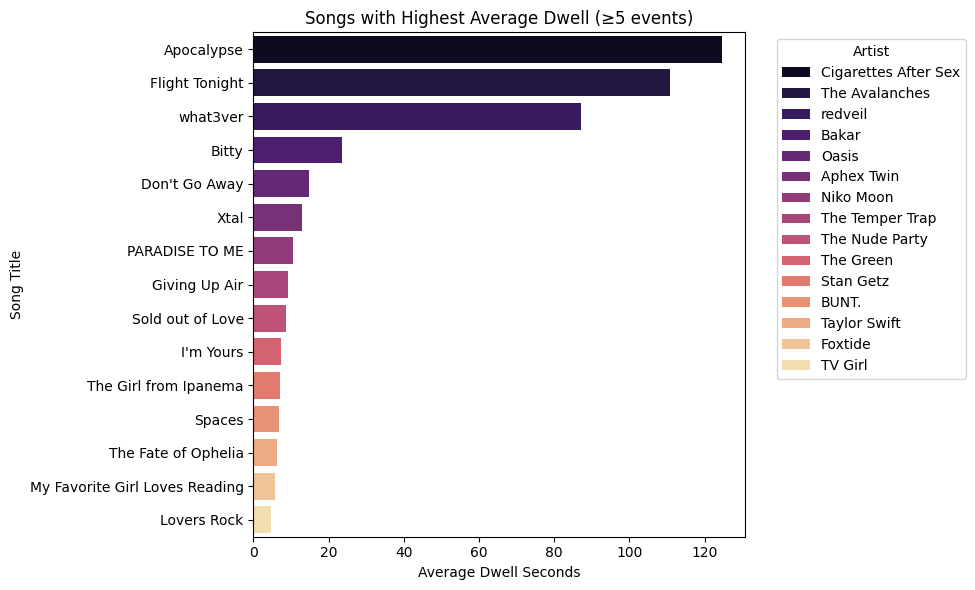

In [28]:
# Songs with highest average dwell time (minimum support to avoid outliers)
MIN_EVENTS = 5

if 'dwell_seconds' in reels_only.columns:
    dwell_summary = (
        reels_only.groupby(['song_id', 'title_label', 'artist_label'], dropna=False)
        .agg(events=('song_id', 'size'), avg_dwell=('dwell_seconds', 'mean'), p90_dwell=('dwell_seconds', lambda s: s.quantile(0.9)))
        .reset_index()
    )
    dwell_filtered = dwell_summary.loc[dwell_summary['events'] >= MIN_EVENTS].copy()
    dwell_top = dwell_filtered.sort_values('avg_dwell', ascending=False).head(TOP_N)

    plt.figure(figsize=(10, 6))
    sns.barplot(data=dwell_top, y='title_label', x='avg_dwell', hue='artist_label', dodge=False, palette='magma')
    plt.title(f'Songs with Highest Average Dwell (≥{MIN_EVENTS} events)')
    plt.xlabel('Average Dwell Seconds')
    plt.ylabel('Song Title')
    plt.legend(title='Artist', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    dwell_top[['song_id','title_label','artist_label','events','avg_dwell','p90_dwell']]
else:
    print('dwell_seconds column not found')


### Cleaning the data 



### Additional exploratory plots
More rate-based views, temporal patterns, correlations, and genre/session insights.


In [36]:
# Helper flags and temporal columns
# Like/save flags
reels_only['like_flag'] = (
    reels_only['rating'].astype(str).str.lower().eq('thumbs_up')
    if 'rating' in reels_only.columns else False
)
reels_only['save_flag'] = (
    reels_only['added_to_library'].astype(str).str.lower().isin(['true','1','yes'])
    if 'added_to_library' in reels_only.columns else False
)

# Time columns
if 'started_at' in reels_only.columns:
    reels_only['hour'] = reels_only['started_at'].dt.hour
    reels_only['dow'] = reels_only['started_at'].dt.dayofweek  # 0=Mon
    reels_only['dow_name'] = reels_only['started_at'].dt.day_name()

print('Flags set. Sample:')
reels_only[['title_label','artist_label','like_flag','save_flag']].head(3)


Flags set. Sample:


,title_label,artist_label,like_flag,save_flag
0,My Own Mess,Skegss,False,False
1,ocean eyes,Billie Eilish,False,False
2,Morning Ride,Fiji,False,False


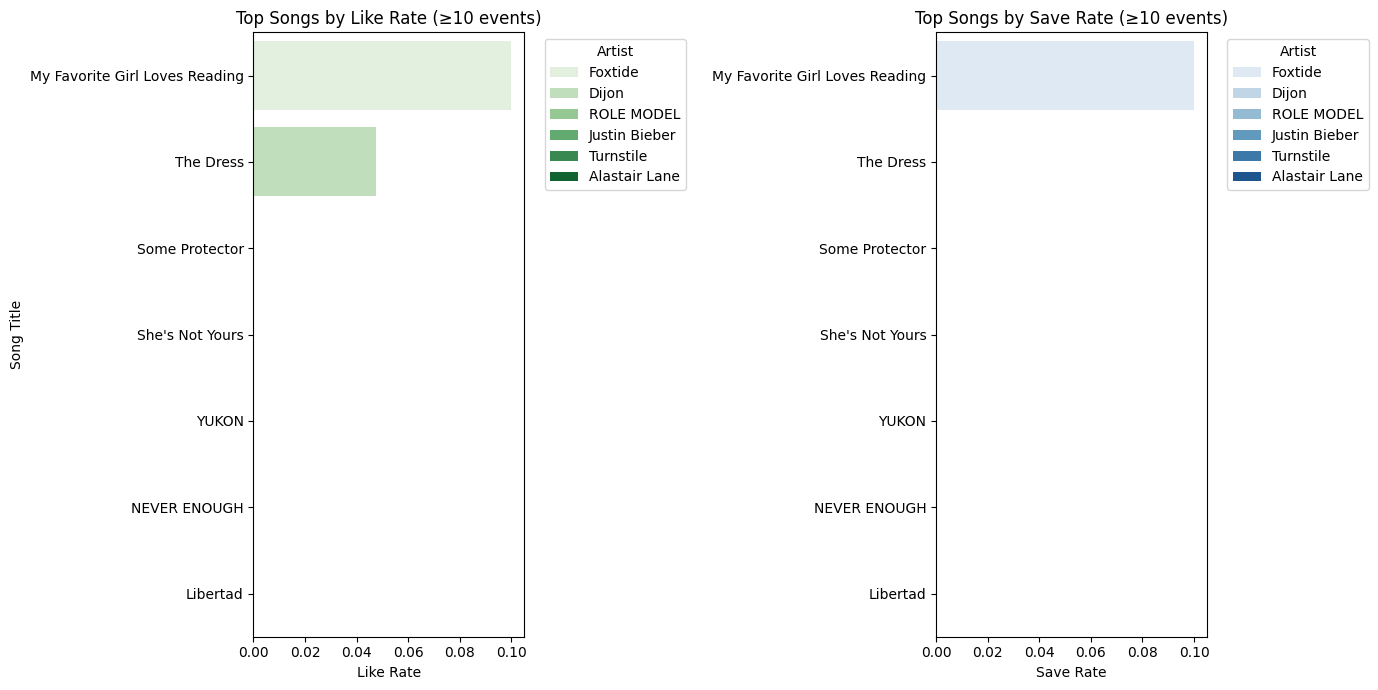

,song_id,title_label,artist_label,events,like_rate
1206,8e96c668-4612-5282-b7af-fd5fb4b473a1,My Favorite Girl Loves Reading,Foxtide,10,0.100000
357,2afc1707-d3d7-576a-afc1-d236281805a1,The Dress,Dijon,21,0.047619
1237,9371d4a9-e954-546c-bc3a-c9bd36476bbd,Some Protector,ROLE MODEL,10,0.000000
1697,cbf51d02-b37f-57c4-9765-5d5dbaafe848,She's Not Yours,Foxtide,18,0.000000
1753,d2fa3a90-665d-5994-87ac-757562ce7fa7,YUKON,Justin Bieber,15,0.000000
2016,f16e555e-04c8-5744-a758-5d5b23c92acd,NEVER ENOUGH,Turnstile,13,0.000000
2130,fe1f2a2d-1092-5d32-b4f9-172cf932c80b,Libertad,Alastair Lane,15,0.000000


In [37]:
# Song-level like/save rates
TOP_N = 15
MIN_EVENTS = 10

song_perf = (
    reels_only.groupby(['song_id','title_label','artist_label'], dropna=False)
    .agg(events=('song_id','size'), likes=('like_flag','sum'), saves=('save_flag','sum'))
    .reset_index()
)
song_perf['like_rate'] = np.where(song_perf['events']>0, song_perf['likes']/song_perf['events'], np.nan)
song_perf['save_rate'] = np.where(song_perf['events']>0, song_perf['saves']/song_perf['events'], np.nan)

song_perf_filt = song_perf.loc[song_perf['events']>=MIN_EVENTS].copy()

best_like = song_perf_filt.sort_values('like_rate', ascending=False).head(TOP_N)
best_save = song_perf_filt.sort_values('save_rate', ascending=False).head(TOP_N)

fig, axes = plt.subplots(1, 2, figsize=(14, 7), sharex=False)
sns.barplot(data=best_like, y='title_label', x='like_rate', hue='artist_label', dodge=False, ax=axes[0], palette='Greens')
axes[0].set_title(f'Top Songs by Like Rate (≥{MIN_EVENTS} events)')
axes[0].set_xlabel('Like Rate')
axes[0].set_ylabel('Song Title')
axes[0].legend(title='Artist', bbox_to_anchor=(1.05,1), loc='upper left')

sns.barplot(data=best_save, y='title_label', x='save_rate', hue='artist_label', dodge=False, ax=axes[1], palette='Blues')
axes[1].set_title(f'Top Songs by Save Rate (≥{MIN_EVENTS} events)')
axes[1].set_xlabel('Save Rate')
axes[1].set_ylabel('')
axes[1].legend(title='Artist', bbox_to_anchor=(1.05,1), loc='upper left')

plt.tight_layout()
plt.show()

best_like[['song_id','title_label','artist_label','events','like_rate']].head(TOP_N)


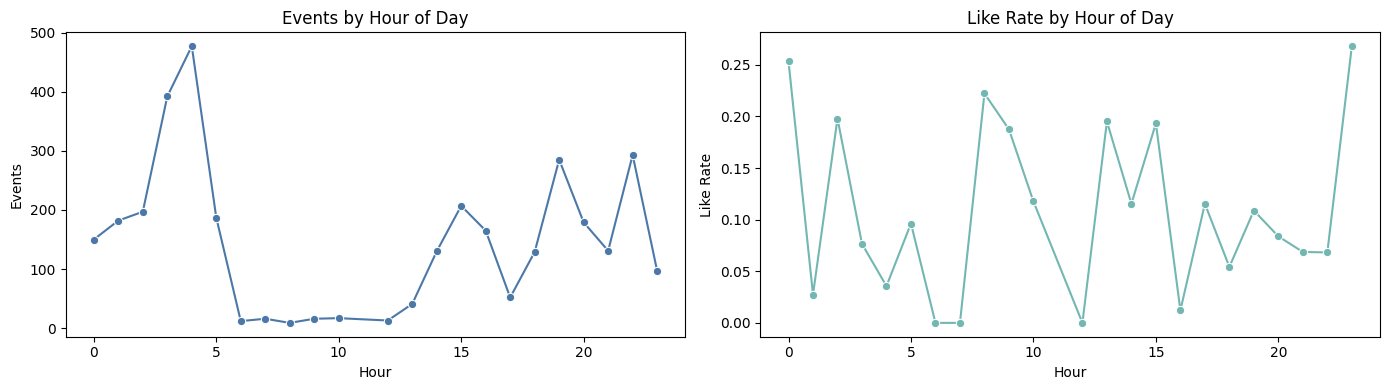

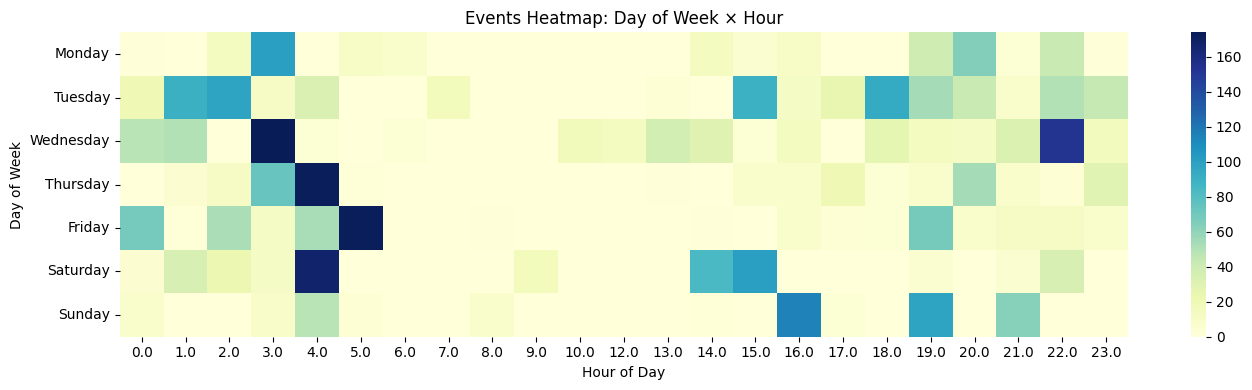

In [38]:
# Time-of-day patterns: hourly volume, like rate, and DoW×hour heatmap
if {'hour','dow','dow_name'}.issubset(reels_only.columns):
    hourly = reels_only.groupby('hour').agg(events=('user_id','size'), likes=('like_flag','sum')).reset_index()
    hourly['like_rate'] = np.where(hourly['events']>0, hourly['likes']/hourly['events'], np.nan)

    fig, axes = plt.subplots(1, 2, figsize=(14, 4))
    sns.lineplot(data=hourly, x='hour', y='events', marker='o', ax=axes[0], color='#4c78a8')
    axes[0].set_title('Events by Hour of Day')
    axes[0].set_xlabel('Hour')
    axes[0].set_ylabel('Events')

    sns.lineplot(data=hourly, x='hour', y='like_rate', marker='o', ax=axes[1], color='#72b7b2')
    axes[1].set_title('Like Rate by Hour of Day')
    axes[1].set_xlabel('Hour')
    axes[1].set_ylabel('Like Rate')

    plt.tight_layout()
    plt.show()

    # Heatmap of volume by DoW and hour
    heat = reels_only.pivot_table(index='dow_name', columns='hour', values='user_id', aggfunc='size', fill_value=0)
    # Reorder weekdays
    dow_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    heat = heat.reindex(dow_order)
    plt.figure(figsize=(14, 4))
    sns.heatmap(heat, cmap='YlGnBu')
    plt.title('Events Heatmap: Day of Week × Hour')
    plt.xlabel('Hour of Day')
    plt.ylabel('Day of Week')
    plt.tight_layout()
    plt.show()
else:
    print('Missing hour/dow columns for time-of-day analysis')


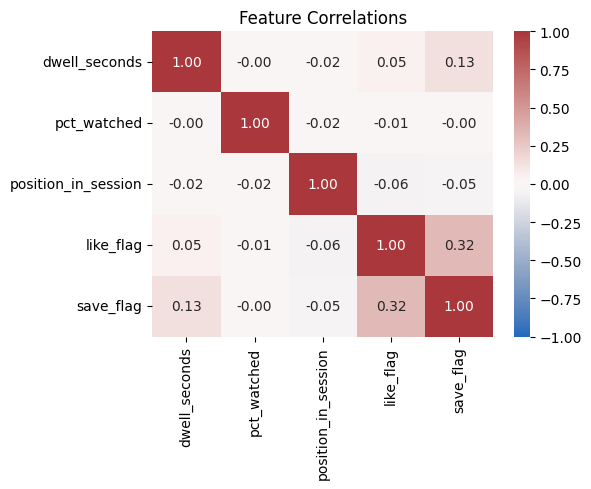

In [39]:
# Correlation heatmap across engagement and reaction features
cols = []
for c in ['dwell_seconds','pct_watched','position_in_session']:
    if c in reels_only.columns:
        cols.append(c)
for c in ['like_flag','save_flag']:
    if c in reels_only.columns:
        cols.append(c)

if len(cols) >= 2:
    corr_df = reels_only[cols].copy()
    # Ensure numeric for flags
    for c in ['like_flag','save_flag']:
        if c in corr_df.columns:
            corr_df[c] = corr_df[c].astype(int)
    corr = corr_df.corr(numeric_only=True)
    plt.figure(figsize=(6, 5))
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='vlag', vmin=-1, vmax=1)
    plt.title('Feature Correlations')
    plt.tight_layout()
    plt.show()
else:
    print('Not enough numeric features for correlation')


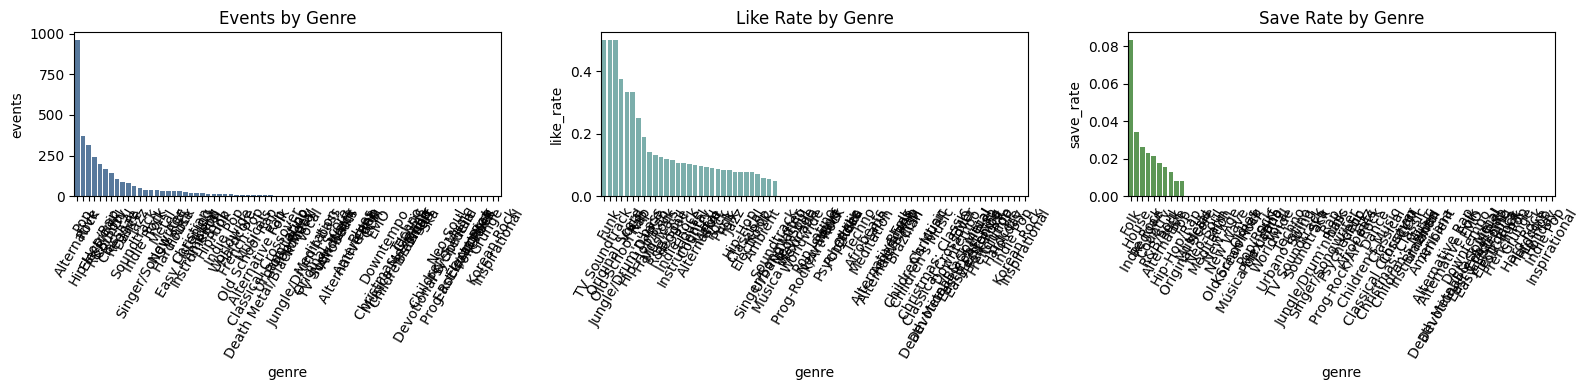

In [41]:
# Genre-level volume and like/save rates
if 'genre' in reels_only.columns:
    genre_stats = (
        reels_only.groupby('genre', dropna=False)
        .agg(events=('song_id','size'), likes=('like_flag','sum'), saves=('save_flag','sum'))
        .reset_index()
    )
    genre_stats['like_rate'] = np.where(genre_stats['events']>0, genre_stats['likes']/genre_stats['events'], np.nan)
    genre_stats['save_rate'] = np.where(genre_stats['events']>0, genre_stats['saves']/genre_stats['events'], np.nan)

    fig, axes = plt.subplots(1, 3, figsize=(16, 4))
    sns.barplot(data=genre_stats.sort_values('events', ascending=False), x='genre', y='events', ax=axes[0], color='#4c78a8')
    axes[0].set_title('Events by Genre')
    axes[0].tick_params(axis='x', rotation=60)

    sns.barplot(data=genre_stats.sort_values('like_rate', ascending=False), x='genre', y='like_rate', ax=axes[1], color='#72b7b2')
    axes[1].set_title('Like Rate by Genre')
    axes[1].tick_params(axis='x', rotation=60)

    sns.barplot(data=genre_stats.sort_values('save_rate', ascending=False), x='genre', y='save_rate', ax=axes[2], color='#54a24b')
    axes[2].set_title('Save Rate by Genre')
    axes[2].tick_params(axis='x', rotation=60)

    plt.tight_layout()
    plt.show()
else:
    print('genre column not found')


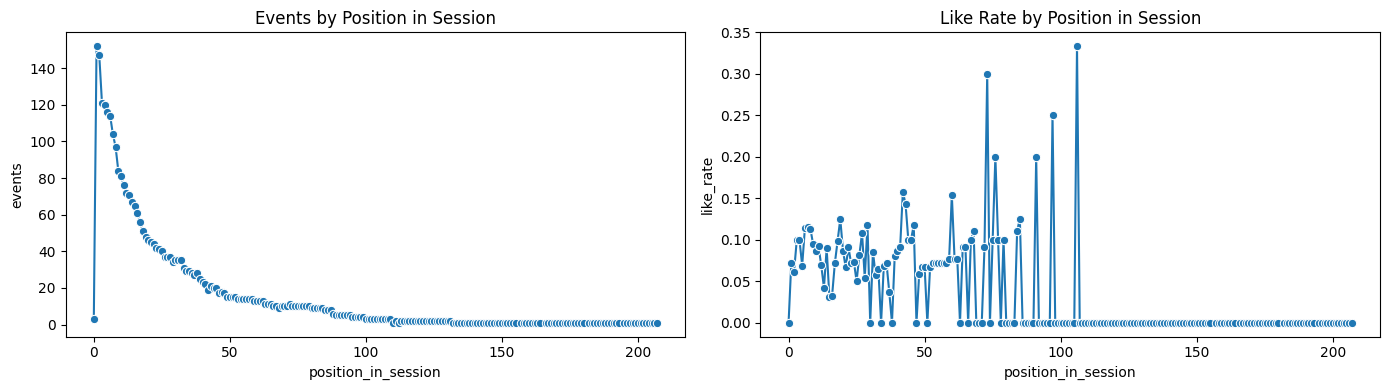

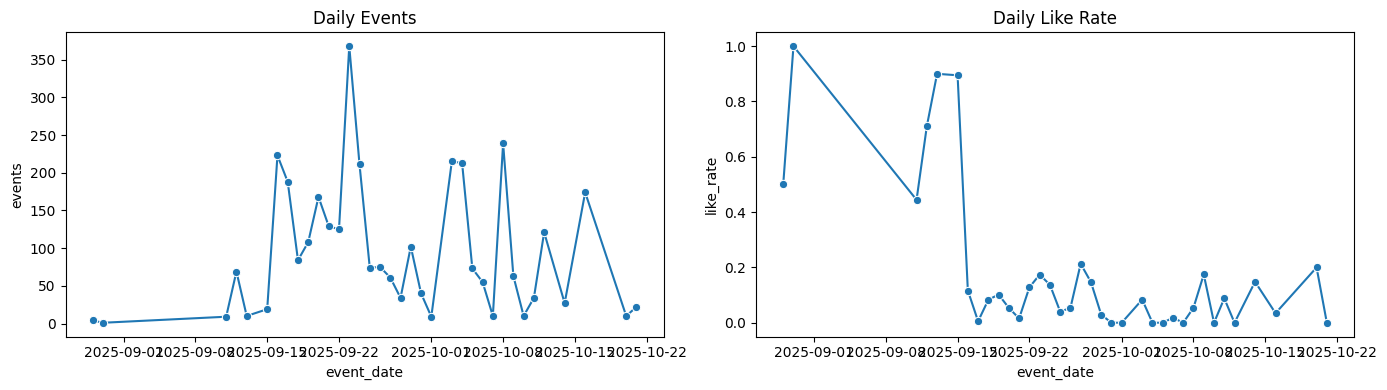

In [42]:
# Session position impact and daily like rate
if 'position_in_session' in reels_only.columns:
    pos_stats = reels_only.groupby('position_in_session').agg(events=('user_id','size'), likes=('like_flag','sum')).reset_index()
    pos_stats['like_rate'] = np.where(pos_stats['events']>0, pos_stats['likes']/pos_stats['events'], np.nan)
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))
    sns.lineplot(data=pos_stats, x='position_in_session', y='events', marker='o', ax=axes[0])
    axes[0].set_title('Events by Position in Session')
    sns.lineplot(data=pos_stats, x='position_in_session', y='like_rate', marker='o', ax=axes[1])
    axes[1].set_title('Like Rate by Position in Session')
    plt.tight_layout(); plt.show()

if 'event_date' in reels_only.columns:
    daily_like = reels_only.groupby('event_date').agg(events=('user_id','size'), likes=('like_flag','sum')).reset_index()
    daily_like['like_rate'] = np.where(daily_like['events']>0, daily_like['likes']/daily_like['events'], np.nan)
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))
    sns.lineplot(data=daily_like, x='event_date', y='events', marker='o', ax=axes[0])
    axes[0].set_title('Daily Events')
    sns.lineplot(data=daily_like, x='event_date', y='like_rate', marker='o', ax=axes[1])
    axes[1].set_title('Daily Like Rate')
    plt.tight_layout(); plt.show()
